# Дифференцирование

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html#matplotlib.pyplot.axhline
* https://numpy.org/doc/stable/reference/generated/numpy.log1p.html#numpy.log1p
* https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html
* https://en.wikipedia.org/wiki/Finite_difference
* https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives.html
* https://en.wikipedia.org/wiki/Gradient_descent
* https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
* https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29

## Задачи для совместного разбора

1\. Дана функция $f(x) = x^2$. Найдите производную этой функции различными способами

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Дана функция $f(x)$. Найдите (аналитически) производную данной функции $f'(x)$ и реализуйте две этих функции. Постройте в одной системе координат графики $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [1, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return np.sin(x) / (np.log(x) + 1)

def f1_derivative_analytical(x):
    numerator = np.cos(x) * (np.log(x) + 1) - np.sin(x) * (1 / x)
    denominator = (np.log(x) + 1)**2
    return numerator / denominator

x_vals = np.linspace(1, 10, 500)
y_f1 = f1(x_vals)
y_f1_derivative = f1_derivative_analytical(x_vals)

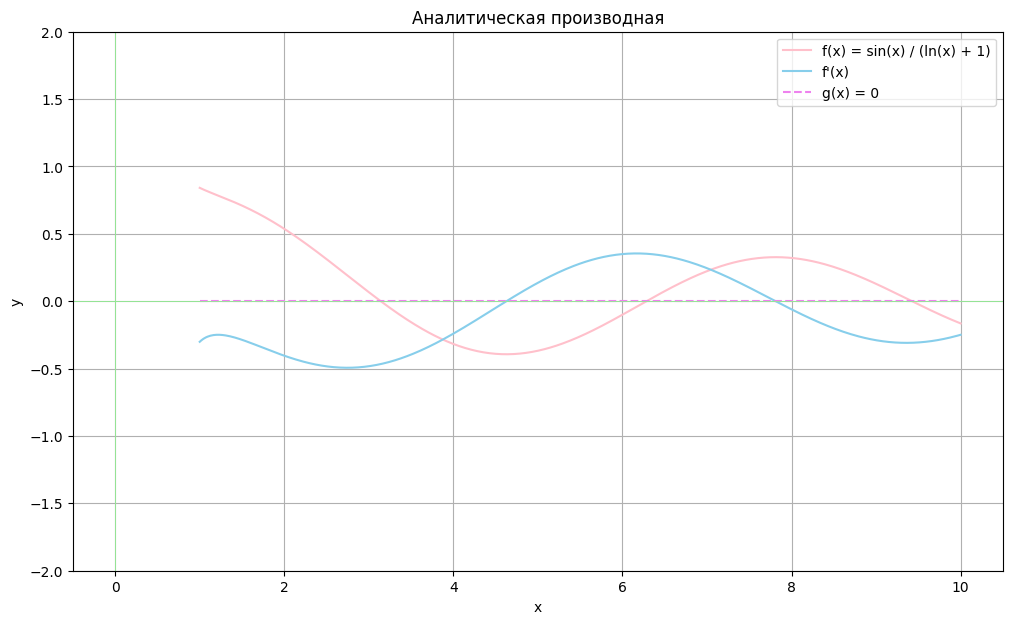

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(x_vals, y_f1, label="f(x) = sin(x) / (ln(x) + 1)", color="pink")
plt.plot(x_vals, y_f1_derivative, label="f'(x)", color="skyblue")
plt.plot(x_vals, np.zeros_like(x_vals), label="g(x) = 0", color="violet", linestyle='--')

plt.title("Аналитическая производная")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.axhline(0, color='lightgreen', linewidth=0.6)
plt.axvline(0, color='lightgreen', linewidth=0.6)
plt.ylim(-2, 2)
plt.show()

<p class="task" id="2"></p>

2\. Дана функция $f(x)$. Найдите (численно) производную данной функции $f'(x)$ на отрезке [1, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

In [ ]:
def f2(x):
    return np.sin(x) / (np.log(x) + 1)

def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

x_vals = np.linspace(1, 10, 500)
y_f2 = f2(x_vals)
y_f2_derivative_numerical = numerical_derivative(f2, x_vals)

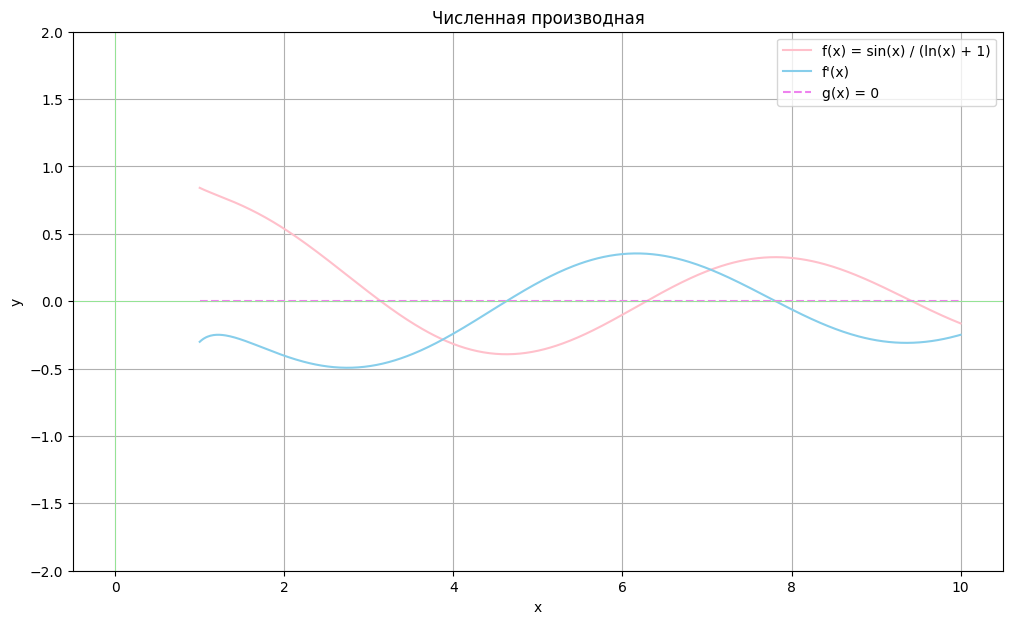

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(x_vals, y_f2, label="f(x) = sin(x) / (ln(x) + 1)", color="pink")
plt.plot(x_vals, y_f2_derivative_numerical, label="f'(x)", color="skyblue")
plt.plot(x_vals, np.zeros_like(x_vals), label="g(x) = 0", color="violet", linestyle='--')

plt.title("Численная производная")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.axhline(0, color='lightgreen', linewidth=0.6)
plt.axvline(0, color='lightgreen', linewidth=0.6)
plt.ylim(-2, 2)
plt.show()

<p class="task" id="3"></p>

3\. Найдите локальный минимум функции $f(x)$ при помощи метода градиентного спуска. В качестве начальной точки используйте $x_0 = 4$. Найдите локальный максимум этой же функции, используя в качестве начальной точки $x_0'=9$.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

In [ ]:
import torch
def f3(x):
    return torch.sin(x) / (torch.log(x) + 1)

x_min = torch.tensor([4.0], requires_grad=True)
optimizer_min = torch.optim.SGD([x_min], lr=0.01)

history_min = []
print("Поиск минимума:")
for i in range(200):
    optimizer_min.zero_grad()
    y = f3(x_min)
    y.backward()
    optimizer_min.step()
    history_min.append(x_min.item())
    if (i + 1) % 20 == 0:
        print(f"Итерация {i+1}: x = {x_min.item():.4f}, f(x) = {y.item():.4f}")

Поиск минимума:
Итерация 20: x = 4.0465, f(x) = -0.3274
Итерация 40: x = 4.0898, f(x) = -0.3369
Итерация 60: x = 4.1299, f(x) = -0.3450
Итерация 80: x = 4.1671, f(x) = -0.3519
Итерация 100: x = 4.2016, f(x) = -0.3579
Итерация 120: x = 4.2336, f(x) = -0.3631
Итерация 140: x = 4.2632, f(x) = -0.3675
Итерация 160: x = 4.2906, f(x) = -0.3712
Итерация 180: x = 4.3159, f(x) = -0.3745
Итерация 200: x = 4.3393, f(x) = -0.3772


In [ ]:
x_max = torch.tensor([9.0], requires_grad=True)
optimizer_max = torch.optim.SGD([x_max], lr=0.1)
history_max = []
print("Поиск максимума:")
for i in range(200):
    optimizer_max.zero_grad()
    y = -f3(x_max)
    y.backward()
    optimizer_max.step()
    history_max.append(x_max.item())
    if (i + 1) % 20 == 0:
        print(f"Итерация {i+1}: x = {x_max.item():.4f}, f(x) = {f3(x_max).item():.4f}")

Поиск максимума:
Итерация 20: x = 8.4995, f(x) = 0.2544
Итерация 40: x = 8.1828, f(x) = 0.3051
Итерация 60: x = 8.0066, f(x) = 0.3209
Итерация 80: x = 7.9131, f(x) = 0.3253
Итерация 100: x = 7.8644, f(x) = 0.3265
Итерация 120: x = 7.8391, f(x) = 0.3269
Итерация 140: x = 7.8261, f(x) = 0.3269
Итерация 160: x = 7.8193, f(x) = 0.3270
Итерация 180: x = 7.8158, f(x) = 0.3270
Итерация 200: x = 7.8140, f(x) = 0.3270


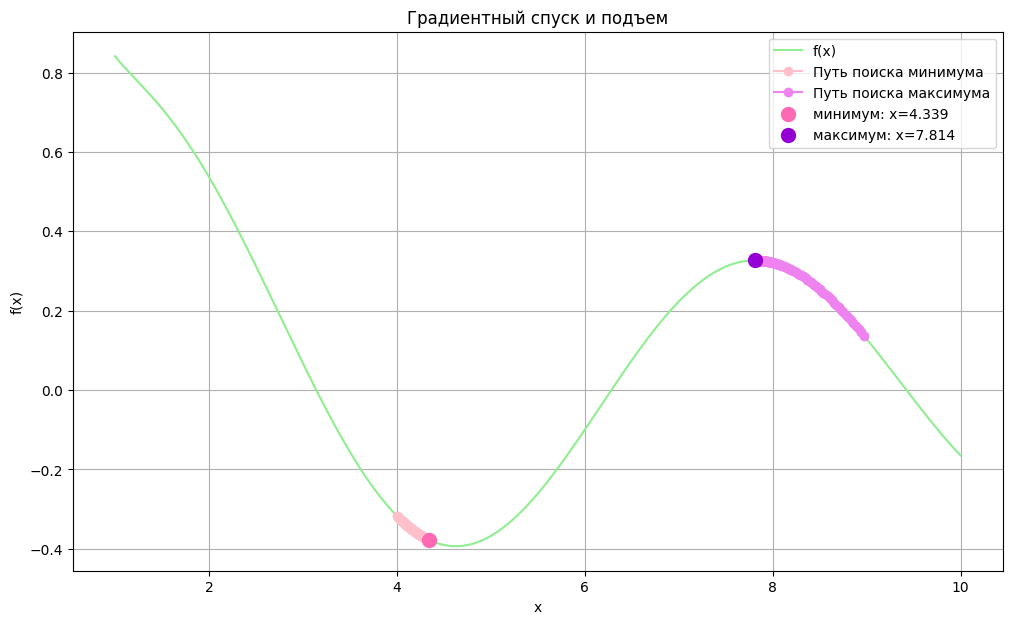

In [ ]:
x_vals_plot = np.linspace(1, 10, 500)
y_vals_plot = np.sin(x_vals_plot) / (np.log(x_vals_plot) + 1)

plt.figure(figsize=(12, 7))
plt.plot(x_vals_plot, y_vals_plot, label="f(x)", color='lightgreen')
plt.plot(history_min, f3(torch.tensor(history_min)).detach().numpy(), 'o-', color='pink', label="Путь поиска минимума")
plt.plot(history_max, f3(torch.tensor(history_max)).detach().numpy(), 'o-', color='violet', label="Путь поиска максимума")
plt.scatter(x_min.item(), f3(x_min).item(), color='hotpink', s=100, zorder=5, label=f"минимум: x={x_min.item():.3f}")
plt.scatter(x_max.item(), f3(x_max).item(), color='darkviolet', s=100, zorder=5, label=f"максимум: x={x_max.item():.3f}")

plt.title("Градиентный спуск и подъем")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

<p class="task" id="4"></p>

4\. Дана функция $f(x)$. Найдите (используя возможности по автоматическому дифференцированию пакета `torch`) производную данной функции $f'(x)$ на отрезке [0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на полуинтервале (0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

In [ ]:
def f4(x):
    return torch.sin(x) / (torch.log(x) + 1)

x_tensor = torch.tensor(np.linspace(1, 10, 500), dtype=torch.float32, requires_grad=True)
y_f4 = f4(x_tensor)

y_f4.sum().backward()
y_f4_derivative_torch = x_tensor.grad

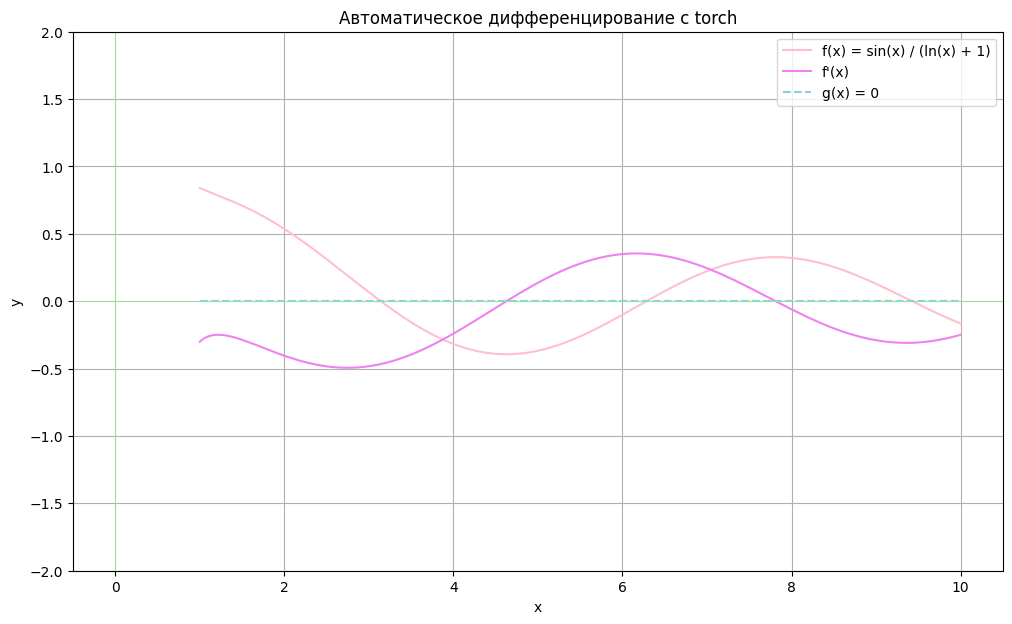

In [ ]:
x_vals_np = x_tensor.detach().numpy()
y_f4_np = y_f4.detach().numpy()
y_f4_derivative_np = y_f4_derivative_torch.detach().numpy()

plt.figure(figsize=(12, 7))
plt.plot(x_vals_np, y_f4_np, label="f(x) = sin(x) / (ln(x) + 1)", color="pink")
plt.plot(x_vals_np, y_f4_derivative_np, label="f'(x)", color="violet")
plt.plot(x_vals_np, np.zeros_like(x_vals_np), label="g(x) = 0", color="skyblue", linestyle='--')

plt.title("Автоматическое дифференцирование с torch")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.axhline(0, color='lightgreen', linewidth=0.6)
plt.axvline(0, color='lightgreen', linewidth=0.6)
plt.ylim(-2, 2)
plt.show()

<p class="task" id="5"></p>

5\. Дана функция $f(x)$. Найдите производную данной функции $f'(x)$ на отрезке [0, 10] при помощи формулы производной сложной функции. На этом же отрезке найдите, используя возможности по автоматическому дифференцированию пакета `torch`. Сравните результаты.

$$f(x) = sin(cos(x))$$

- [ ] Проверено на семинаре

In [ ]:
def g(x: th.Tensor) -> th.Tensor:
    pass

def h(x: th.Tensor) -> th.Tensor:
    pass

def dfdg(x: th.Tensor) -> th.Tensor:
    pass

def dgdx(x: th.Tensor) -> th.Tensor:
    pass

def dfdx(x: th.Tensor) -> th.Tensor:
    pass

In [ ]:
def f5_analytical(x):
    return np.sin(np.cos(x))

def f5_derivative_analytical(x):
    return -np.sin(x) * np.cos(np.cos(x))

x_vals_np = np.linspace(0, 10, 500)
y_analytical = f5_analytical(x_vals_np)
y_derivative_analytical = f5_derivative_analytical(x_vals_np)

In [ ]:
def f5_torch(x):
    return torch.sin(torch.cos(x))

x_tensor = torch.tensor(x_vals_np, dtype=torch.float32, requires_grad=True)
y_torch = f5_torch(x_tensor)

y_torch.sum().backward()
y_derivative_torch = x_tensor.grad.detach().numpy()

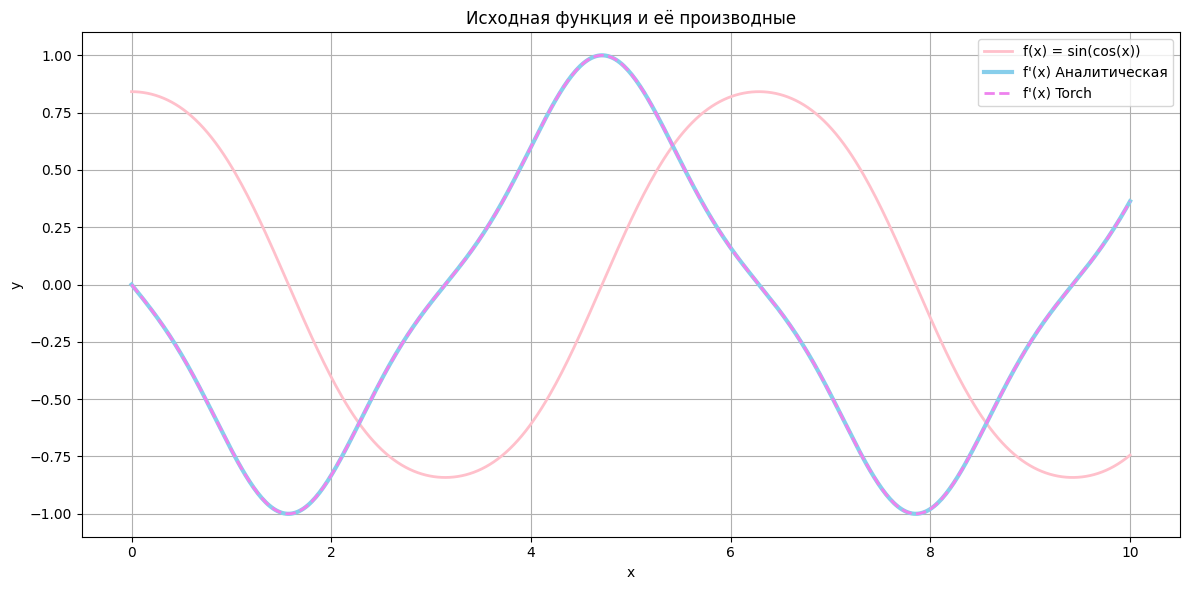

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(x_vals_np, y_analytical, label="f(x) = sin(cos(x))", color="pink", linewidth=2)

plt.plot(x_vals_np, y_derivative_analytical, label="f'(x) Аналитическая", color="skyblue", linewidth=3)
plt.plot(x_vals_np, y_derivative_torch, label="f'(x) Torch", color="violet", linestyle='--', linewidth=2)

plt.title("Исходная функция и её производные")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()